In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# Load Data
data = pd.read_csv("processed_data.txt", sep="|")
data.head()

,Gender,Age_Scaled,Salary_Transformed_Scaled,Purchased
0,1,-1.781797,-1.809254,0
1,1,-0.253587,-1.752550,0
2,0,-1.113206,-0.725701,0
3,0,-1.017692,-0.246493,0
4,1,-1.781797,0.311281,0


In [9]:
# Define features
X = data[["Gender", "Age_Scaled", "Salary_Transformed_Scaled"]]

In [11]:
# Define target
y = data["Purchased"]

In [13]:
# Divide data into training and testing.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=35)

In [15]:
# Show method config for sklearn
from sklearn import set_config
set_config(print_changed_only=False, display='diagram')

In [25]:
# Decison tree object 
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=2)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=None, splitter='best')

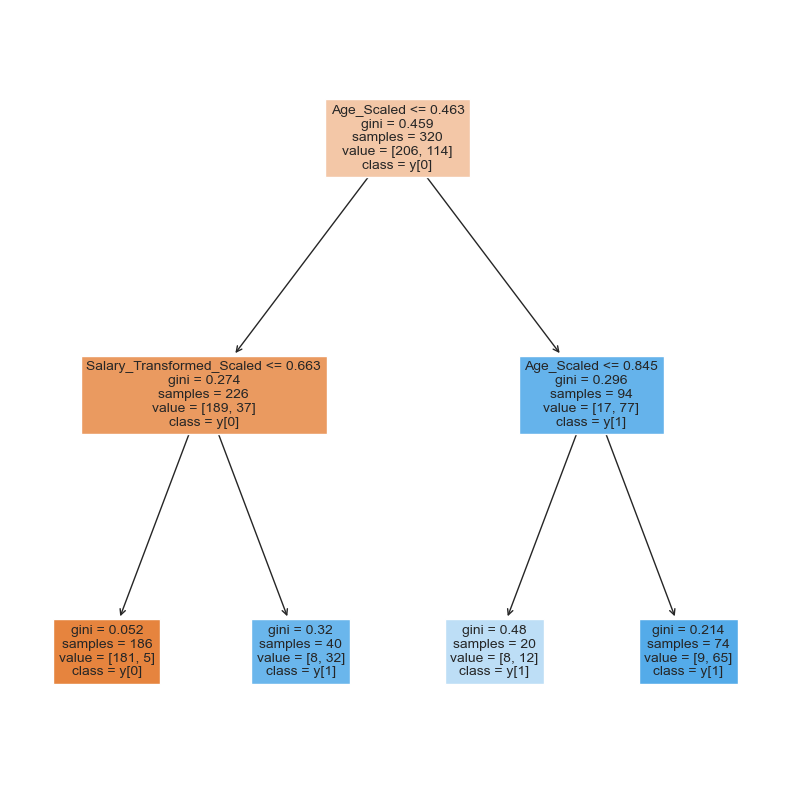

In [27]:
# Plot tree
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(classifier, feature_names=X.columns, class_names=True, fontsize=10, filled=True)
plt.show()

In [29]:
# Generate predictions on "X_test"
y_pred = classifier.predict(X_test)

In [31]:
# Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[49  2]
 [ 3 26]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        51
           1       0.93      0.90      0.91        29

    accuracy                           0.94        80
   macro avg       0.94      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80



In [33]:
# Assess performance
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0625
Mean Squared Error: 0.0625
Root Mean Squared Error: 0.25
